# Matrix Factorization

## Import Package

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Model

In [2]:
class Matrix_Factorization:
    def __init__(self, alpha = 0.00001, iterations = 50, num_of_latent = 200, lam = 0.0005):
        """
            Some initializations, if neccesary
            
            attributes: 
                        alpha: Learning Rate, default 0.01
                        num_iter: Number of Iterations to update coefficient with training data
                        num_of_latent: Number of latent factor.
                        lam: Regularization constant
                        
            
            TODO: 1. Initialize all variables needed.
        """
        
        self.alpha = alpha
        self.iterations = iterations
        self.num_of_latent = num_of_latent
        self.lam = lam
        
    def fit(self, train, test):
        """
            Train: list of tuples with (User, Movie, Rating)
            num_user: Number of unique user.
            num_movie: Number of unique movie
            
            TODO: 2. Initialize num_user and num_movie
                  3. Save the training set.
                  4. Initialize P and Q matrix, with normal distribution with mean = 0. 
                  Hint: Think about what P and Q represent, what they should do.Think about the shape too. 
            
        
        """
        num_user = max(map(lambda t:t[0], train)) + 1
        num_movie =  max(map(lambda t:t[1], train)) + 1
        
        self.train = train
        
        self.P = np.random.normal(loc = 0, size=[num_user, self.num_of_latent])
        self.Q = np.random.normal(loc = 0, size=[num_movie, self.num_of_latent])
        
        rmse_lst = []
        score = []
        
        """
            TODO: 5: Calculate the error, using P and Q matrix. 
                  6: We need to check if the absolute value error is less than some constant. Store the previous Q and P for adaptive learning rate.
                      If it is less than that constant then we update P and Q matrix. 
                      (When update, update the P and Q at the same time. Think about why it is important.)
                      Otherwise use the error to update the Q and P matrix.
                      
                  7: For each entry update temp_mse, and append the Current iteration RMSE to rmse_lst.
                  
        """
 
        for f in range(self.iterations):
            ### Random Shuffle. Why is this called?
            np.random.shuffle(self.train)
            
            temp_mse = 0

            previous_Q = self.Q.copy()
            previous_P = self.P.copy()
            
            Count = 0
   
            for tup in self.train:
                u,i,rating = tup
                error = rating - self.Q[i].T @ self.P[u]
                
                if abs(error) > 20 :
                    continue
                Count += 1
                temp_mse += error**2
                
                #### Don't Modify this code, helpful for converge.
#                 if np.isinf(self.Q).any() or np.isinf(self.P).any() or np.isnan(self.Q).any() or np.isnan(self.P).any():
#                     pass
#                 else:
                    #### NEED TO MODIFY #### Update P and Q.
                p = self.P[u].copy()
                self.P[u] += 2 * self.alpha * error * self.Q[i] - self.lam * self.P[u]
                self.Q[i] += 2 * self.alpha * error * p - self.lam * self.Q[i]
                
            rmse_lst.append((temp_mse / Count)**0.5)
            
            
            """
                TODO: 8: Implement the adaptive learning rate.
                         If current rmse is less than previous iteration, let's increase by a factor range from 1 - 1.5
                         Otherwise we decrease by a factor range from 0.5 - 1
                      9: If the current rmse is greater than previous iteration.
                         Check the relative error, (previous - current)/ previous.
                         If it is greater than 0.1, we restore the previous Q and P. (Try without it. Think about why we need this.)
            """
            if len(rmse_lst)==1 or rmse_lst[-1]<rmse_lst[-2]:
                self.alpha = self.alpha*1.1
            else:
                self.alpha = self.alpha*0.75
                if (rmse_lst[-1] - rmse_lst[-2])/rmse_lst[-2] > 0.1:
                    self.Q = previous_Q
                    self.P = previous_P
                    
            error = 0
            pred = self.predict(map(lambda t: (t[0],t[1]),test))
            for i in range(len(test)):
                error += (test[i][2] - pred[i])**2
            score += [(error/ len(test))** (0.5)]
            
        self.score = score
        self.rmse = rmse_lst
        
    def ind_predict(self, tup):
        """
            tup: One single entry, (user, movie)
            
            TODO: 10: Use P and Q to make prediction on single entry.
            
        """
        u,i = tup
        
        return self.Q[i].T @ self.P[u]
    def predict(self, X):
        """
            X: list of entries
            
            TODO: 11: Use ind_predict we create to make predicitons.
        """
        res = []
        for i in X:
            res.append(self.ind_predict(i))
        return res

In [3]:
class Matrix_Factorization_with_bias:
    def __init__(self, alpha = 0.00001, iterations = 50, num_of_latent = 200, lam = 0.01):
        
        """
            Some initializations, if neccesary
            
            attributes: 
                        alpha: Learning Rate, default 0.01
                        num_iter: Number of Iterations to update coefficient with training data
                        num_of_latent: Number of latent factor.
                        lam: Regularization constant
 
            
            TODO: 1. Initialize all variables needed.
        """
            
        self.alpha = alpha
        self.iterations = iterations
        self.num_of_latent = num_of_latent
        self.lam = lam


        
    def fit(self, train, test):
        """
            Train: list of tuples with (User, Movie, Rating)
            num_user: Number of unique user.
            num_movie: Number of unique movie
            
            TODO: 2. Initialize num_user and num_movie.
                  3. Save the training set.
                  4. Initialize bu , bi and b. b is the global mean of the rating.
                  5. Initialize P and Q matrix. 
                  Hint: Think about what P and Q represent, what they should do.Think about the shape too. 
                  
            
        
        """
        num_user = max(map(lambda t:t[0], train)) + 1
        num_movie =  max(map(lambda t:t[1], train)) + 1
        
        self.train = train
        
        self.P = np.random.normal(loc = 0, size=[num_user, self.num_of_latent])
        self.Q = np.random.normal(loc = 0, size=[num_movie, self.num_of_latent])
        
        self.bu = np.random.uniform(size=num_user)
        self.bi = np.random.uniform(size=num_movie)
        self.b = np.mean(list(map(lambda t:t[2], train)))
        
        rmse_lst = []
        self.score = []
        """
            TODO: 5: Calculate the error, using P , Q , bu , bi and b. 
                  6: Update the P , Q , bu , bi and b with error you calculate. 
                    (Think about why we don't need to check the absolute of error)
                  7: For each entry update temp_mse, and append the Current iteration RMSE to rmse_lst.
                  
        """


        for f in range(self.iterations):
            
            np.random.shuffle(self.train)
            
            temp_mse = 0
            previous_Q = self.Q.copy()
            previous_P = self.P.copy()
            previous_bu = self.bu.copy()
            previous_bi = self.bi.copy()
            
            Count = 0
            for tup in self.train:
                u,i,rating = tup
                
                error = rating - self.Q[i].T @ self.P[u] - self.bu[u] - self.bi[i] - self.b
                
                if abs(error) > 20:
                    continue

                Count += 1   
                temp_mse += error ** 2
                
                # You might want to update column by column
                p = self.P[u].copy()
                self.P[u] += 2 * self.alpha * error * self.Q[i] - self.lam * self.P[u]
                self.Q[i] += 2 * self.alpha * error * p - self.lam * self.Q[i]
                
                self.bu[u] += 2 * self.alpha * error - self.lam * self.bu[u]
                self.bi[i] += 2 * self.alpha * error - self.lam * self.bi[i]
            
            rmse_lst.append((temp_mse / Count)**0.5)
                
            
            
            """
                TODO: 8: Implement the adaptive learning rate.
                         If current rmse is less than previous iteration, let's increase by a factor range from 1 - 1.5
                         Otherwise we decrease by a factor range from 0.5 - 1
                      9: If the current rmse is greater than previous iteration.
                         Check the relative error, (previous - current)/ previous.
                         If it is greater than 0.1, we restore the previous Q and P. (Try without it. Think about why we need this.)
            """
            
            if len(rmse_lst)==1 or rmse_lst[-1]<rmse_lst[-2]:
                self.alpha = self.alpha*1.1
            else:
                self.alpha = self.alpha*0.75
                if (rmse_lst[-1] - rmse_lst[-2])/rmse_lst[-2] > 0.1:
                    self.Q = previous_Q
                    self.P = previous_P 
                    self.bu = previous_bu
                    self.bi = previous_bi

            error = 0
            pred = self.predict(map(lambda t: (t[0],t[1]),test))
            for i in range(len(test)):
                error += (test[i][2] - pred[i])**2
            self.score += [(error/ len(test))** (0.5)]
            
        self.rmse = rmse_lst
            
    def ind_predict(self, tup):
        """
            tup: One single entry, (user, movie)
            
            TODO: 10: Use P and Q to make prediction on single entry.
            
        """
        u,i = tup
        
        return self.Q[i].T @ self.P[u] + self.bu[u] + self.bi[i] + self.b
    def predict(self, X):
        """
            X: list of entries
            
            TODO: 11: Use ind_predict we create to make predicitons.
        """
        res = []
        for i in X:
            res.append(self.ind_predict(i))
        return res
        
    

## Preprocessing

In [4]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
ratings = ratings.sort_values('timestamp').reset_index(drop = True).astype(int)
a = np.sort(ratings.movieId.unique())
index_dict = {}
for i in range(len(a)):
    index_dict[a[i]]  = i
ratings.movieId = ratings.movieId.apply(lambda x: index_dict[x]) 

grouped_userId = list(ratings.groupby(['userId']).apply(lambda x: x[['movieId','rating']].values))
grouped_movieId = list(ratings.groupby(['movieId']).apply(lambda x: x[['userId','rating']].values))

In [5]:
np.random.seed(0)
train = set()
test = set()

for i in range(len(grouped_movieId)):
    temp_len = len(grouped_movieId[i])
    for j in range(temp_len):
        if j < temp_len * 0.8:
            train.add((grouped_movieId[i][j][0]-1,i - 1, grouped_movieId[i][j][1]))
        else:
            test.add((grouped_movieId[i][j][0] -1, i - 1,grouped_movieId[i][j][1]))
train = list(train)
test = list(test)

In [6]:
len(train), len(test)

(84071, 16765)

## Train and Test

### Model without bias

In [7]:
np.random.seed(0)
clf = Matrix_Factorization(alpha = 5e-4, iterations = 50, num_of_latent = 5, lam = 6e-3)
clf.fit(train,test)

Text(0, 0.5, 'RMSE')

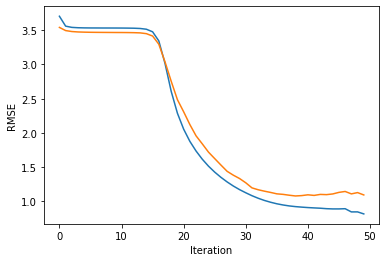

In [8]:
ax = plt.subplot()
ax.plot(clf.rmse)
ax.plot(clf.score)
ax.set_xlabel("Iteration")
ax.set_ylabel("RMSE")

In [9]:
min(clf.score)

1.080243294625906

### Model with bias

In [10]:
np.random.seed(0)
clf = Matrix_Factorization_with_bias(alpha = 5e-4, iterations = 50, num_of_latent = 5, lam = 6e-3)

clf.fit(train,test)

Text(0, 0.5, 'RMSE')

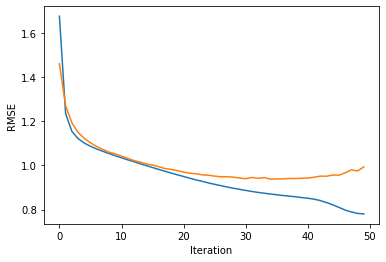

In [11]:
ax = plt.subplot()
ax.plot(clf.rmse)
ax.plot(clf.score)
ax.set_xlabel("Iteration")
ax.set_ylabel("RMSE")

In [12]:
min(clf.score)

0.9378044950925724

In [13]:
min(clf.rmse)

0.780171344848244